## Final Project - Washington, D.C. Income & Service Requests

#### *Service Requests Dataset*
The first dataset was found on [OpenData DC](https://opendata.dc.gov/datasets/311-city-service-requests-in-2017?geometry=-77.509%2C38.806%2C-76.520%2C38.993).

It was discovered during a Google search for "DC 311 Service Requests". 

The link above was clicked, followed by "Download", then "Spreadsheet" under "Filtered Dataset" to access the dataset.

The size of the CSV file is 120.8 MB and it contains information about 311 service requests made in DC.


#### *Income Dataset*
The second dataset was found on a [DC.gov Office of Planning](https://planning.dc.gov/page/american-community-survey-acs-estimates).

It was discovered during a Google search for "ACS 5 year Estimates DC Wards". 

The link above was clicked, followed by the "2013 - 2017 ACS 5-Year Ward" link under "Attachment(s)" to access the dataset.

The size of the CSV file is 0.19 MB and it contains socioeconomic information about the wards in DC.


#### *Research Questions*
This analysis aims to answer the following questions:
- Is there an association between household/family income and service requests?
- Are any wards prioritized in terms of the avergage length of time it takes to resolve service requests? 
- What type of service requests were submitted the most?

### Appendix

The ranges and types of income are as defined in the table below:

Range of Income (A salary of...)

|   Low Income     |  High Income      |                 
|      :---:       |      :---:        |        
| 10,000 or less   | 100,000 to 149,999|         
| 10,000 to 14,999 | 150,000 to 199,999|
| 15,000 to 24,999 | 200,000 or more   |  

    
Type of Income

* Household: One or more people living in the same house, condominium, or apartment, regardless of relationship.
* Family: A group of immediate family members living together.



### Import Modules and Load Data

In [1]:
#import libraries
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
#load data

#service request dataset from OpenData DC
serv_req = pd.read_csv("/Users/jennablackwell/Desktop/2020-2021/Spring 2021/DATA601/Final Project/311_City_Service_Requests_in_2017.csv", engine = "python")

#family/household income dataset from DC.gov
income = pd.read_excel("/Users/jennablackwell/Desktop/2020-2021/Spring 2021/DATA601/Final Project/2013-2017 ACS 5-Year Ward.xls", sheet_name = 2)

In [3]:
#display number of rows and columns
print(serv_req.shape)

#display first five rows of service request dataframe
serv_req.head()

(310108, 30)


,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,CITY,STATE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS
0,-77.031953,38.917563,1856164,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2017/01/27 22:53:43+00,2017/06/12 13:06:51+00,...,397229.12,138854.540003,38.917555,-77.031951,WASHINGTON,DC,20009.0,804064.0,1.0,NaN
1,-77.001314,38.890945,1856165,RPP,Residential Parking Permit Violation,PEMA- Parking Enforcement Management Administr...,DPW,1,2017/01/27 21:53:55+00,2017/01/28 01:28:17+00,...,399886.24,135899.220000,38.890937,-77.001311,WASHINGTON,DC,20002.0,800805.0,6.0,NaN
2,-77.078439,38.936910,1856166,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2017/01/28 01:07:06+00,2017/01/28 02:46:29+00,...,393199.60,141004.690000,38.936903,-77.078437,WASHINGTON,DC,20016.0,223363.0,3.0,NaN
3,-77.061963,38.903430,1856167,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2017/01/28 23:23:08+00,2017/03/03 17:43:51+00,...,394625.56,137287.050003,38.903422,-77.061961,WASHINGTON,DC,20007.0,807099.0,2.0,Meter Repaired
4,-77.034467,38.962620,1856168,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,DPW,1,2017/01/29 02:37:15+00,2017/01/29 03:58:39+00,...,397013.06,143856.390000,38.962613,-77.034464,WASHINGTON,DC,20011.0,256155.0,4.0,NaN


In [4]:
#display number of rows and columns
print(income.shape)

#display first five rows of service request dataframe
income.head()

(169, 17)


,DP03: SELECTED ECONOMIC CHARACTERISTICS IN THE DISTRICT OF COLUMBIA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2013-2017 American Community Survey 5-Year Est...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject,Ward 1,NaN,Ward 2,NaN,Ward 3,NaN,Ward 4,NaN,Ward 5,NaN,Ward 6,NaN,Ward 7,NaN,Ward 8,NaN
2,NaN,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent
3,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population 16 years and over,73861,73861,73759,73759,71683,71683,69045,69045,72938,72938,79004,79004,62981,62981,61344,61344


### Data Cleaning and Preparation 
The following steps are conducted to ensure the data is ready for manipulation:

***Service Request Data***      
1) Drop all rows where the value in the Ward column is null since it totals to less than 5% of the observations in the dataset (rule of thumb according to [Statistics Solutions](#reference) - "In statistical language, if the number of the cases [with missing values] is less than 5% of the sample, then the researcher can drop them").       
2) Recode the values in the Ward column.   
3) Change the datatype of the Ward column to category.   
4) Drop uneccessary columns.   
5) Change the datatype of the Add Date and Resolution Date columns to datetime.  
5) Create a new column called Resolution Time that subtracts the Add Date column from the Resolution Date column.    
6) Create a new column called Resolution Hours, which is the Reolution Time column converted into hours.   
7) Drop the Add Date, Resolution Date, and Resolution Time columns.   
8) Rearrange the order of the columns.   


***Income Data***  
1) Rename the columns.   
2) Subset only the rows that are related to income.    
3) Drop the rows that do not contain income ranges nor the total amount of households and families.   
4) Convert the datatypes of all of the columns to float.    

In [5]:
#drop all rows where WARD value is null 
serv_req = serv_req[serv_req['WARD'].notna()]

In [6]:
#recode values in the ward column 
warddict = {'Ward 1':1,'1':1,
            'Ward 2':2,'2':2,
            'Ward 3':3,'3':3,
            'Ward 4':4,'4':4,
            'Ward 5':5,'5':5,
            'Ward 6':6,'6':6,
            'Ward 7':7,'7':7,
            'Ward 8':8,'8':8, 
            }
serv_req['WARD'] = serv_req['WARD'].replace(warddict)

In [7]:
#recode datatype of ward column
serv_req['WARD'] = serv_req['WARD'].astype("category")

In [8]:
#drop unnecessary columns 
serv_req = serv_req.drop(columns = ['X','Y','XCOORD','YCOORD','LATITUDE','LONGITUDE','OBJECTID',
                                    'ORGANIZATIONACRONYM','SERVICEDUEDATE', 'SERVICECODE',
                                    'SERVICEORDERDATE', 'SERVICETYPECODEDESCRIPTION','INSPECTIONFLAG',
                                    'INSPECTIONDATE','STATUS_CODE','INSPECTORNAME','SERVICEORDERSTATUS',
                                    'CITY','STATE','ZIPCODE','MARADDRESSREPOSITORYID','SERVICEREQUESTID',
                                    'STREETADDRESS', "PRIORITY","DETAILS"])

In [9]:
#convert add date and resolution date columns to datetime datatypes
serv_req["RESOLUTIONDATE"] =  pd.to_datetime(serv_req["RESOLUTIONDATE"])
serv_req["ADDDATE"] =  pd.to_datetime(serv_req["ADDDATE"])

In [10]:
#create new resolution time column 
serv_req["RESOLUTIONTIME"] = serv_req["RESOLUTIONDATE"] - serv_req["ADDDATE"]

In [11]:
#create new column that converts resolution time to hours
serv_req["RESOLUTIONHOURS"] = serv_req["RESOLUTIONTIME"]/np.timedelta64(1, 'h')

In [12]:
#delete unecessary columns to avoid redundancy 
serv_req = serv_req.drop(columns=["RESOLUTIONTIME","ADDDATE","RESOLUTIONDATE"])

In [13]:
#rearrange order of columns
serv_req = serv_req[['SERVICECODEDESCRIPTION','SERVICECALLCOUNT','RESOLUTIONHOURS', 'WARD']]

In [14]:
#rename columns
income = income.rename(columns={'Unnamed: 1': 'Ward 1 Estimate','Unnamed: 2': 'Ward 1 Percent', 
                                'Unnamed: 3': 'Ward 2 Estimate','Unnamed: 4': 'Ward 2 Percent', 
                                'Unnamed: 5': 'Ward 3 Estimate','Unnamed: 6': 'Ward 3 Percent',
                                'Unnamed: 7': 'Ward 4 Estimate','Unnamed: 8': 'Ward 4 Percent',
                                'Unnamed: 9': 'Ward 5 Estimate','Unnamed: 10': 'Ward 5 Percent',
                                'Unnamed: 11': 'Ward 6 Estimate','Unnamed: 12': 'Ward 6 Percent',
                                'Unnamed: 13': 'Ward 7 Estimate','Unnamed: 14': 'Ward 7 Percent',
                                'Unnamed: 15': 'Ward 8 Estimate','Unnamed: 16': 'Ward 8 Percent'})

In [15]:
#subset rows related to income 
income = income.iloc[69:107,:]

In [16]:
#drop rows that are not income ranges or total amount of households/families
income = income.drop(income.index[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]])

In [17]:
#convert datatypes of columns to numeric
income['Ward 1 Estimate'] = income['Ward 1 Estimate'].astype(float)
income['Ward 1 Percent'] = income['Ward 1 Percent'].astype(float)
income['Ward 2 Estimate'] = income['Ward 2 Estimate'].astype(float)
income['Ward 2 Percent'] = income['Ward 2 Percent'].astype(float)
income['Ward 3 Estimate'] = income['Ward 3 Estimate'].astype(float)
income['Ward 3 Percent'] = income['Ward 3 Percent'].astype(float)
income['Ward 4 Estimate'] = income['Ward 4 Estimate'].astype(float)
income['Ward 4 Percent'] = income['Ward 4 Percent'].astype(float)
income['Ward 5 Estimate'] = income['Ward 5 Estimate'].astype(float)
income['Ward 5 Percent'] = income['Ward 5 Percent'].astype(float)
income['Ward 6 Estimate'] = income['Ward 6 Estimate'].astype(float)
income['Ward 6 Percent'] = income['Ward 6 Percent'].astype(float)
income['Ward 7 Estimate'] = income['Ward 7 Estimate'].astype(float)
income['Ward 7 Percent'] = income['Ward 7 Percent'].astype(float)
income['Ward 8 Estimate'] = income['Ward 8 Estimate'].astype(float)
income['Ward 8 Percent'] = income['Ward 8 Percent'].astype(float)

### Exploratory Data Analysis

***Service Request Data***  

The service request dataframe initially had  310,108 observations and 30  variables, but after cleaning and preparing it for analysis, it now has 307,245 observations and 4 variables. Two variables are categorical and the remaining two are numerical.

Majority of the service requests pertain to Bulk Collection at 16.47% and came from Ward 2 at 16.57%. 

The average amount of time it takes 311 to resolve a service request is 726.79 hours (30 days) with a minimum of 0 hours (less than an hour) and a maximum of 21841.22 hours (910 days or 2.5 years). 

Each service request corresponds to only 1 serivice call count.

***Income Data***

The income dataframe initially had 169 observations and 17 variables, but after cleaning and preparing it for analysis, it now has 22 observations and 17 variables, all of which are numerical. See below.

In [18]:
#display new number of rows and columns
print(serv_req.shape)

#display first five rows of cleaned service request dataframe
serv_req.head()

(307245, 4)


,SERVICECODEDESCRIPTION,SERVICECALLCOUNT,RESOLUTIONHOURS,WARD
0,Parking Meter Repair,1,3254.218889,1.0
1,Residential Parking Permit Violation,1,3.572778,6.0
2,Parking Enforcement,1,1.656389,3.0
3,Parking Meter Repair,1,810.345278,2.0
4,Parking Enforcement,1,1.356667,4.0


In [19]:
#display new number of rows and columns
print(income.shape)

#display first five rows of cleaned service request dataframe
income.head()

(22, 17)


,DP03: SELECTED ECONOMIC CHARACTERISTICS IN THE DISTRICT OF COLUMBIA,Ward 1 Estimate,Ward 1 Percent,Ward 2 Estimate,Ward 2 Percent,Ward 3 Estimate,Ward 3 Percent,Ward 4 Estimate,Ward 4 Percent,Ward 5 Estimate,Ward 5 Percent,Ward 6 Estimate,Ward 6 Percent,Ward 7 Estimate,Ward 7 Percent,Ward 8 Estimate,Ward 8 Percent
69,Total households,35314.0,35314.000,38126.0,38126.000,38106.0,38106.000,30754.0,30754.000,33410.0,33410.000,42218.0,42218.000,30138.0,30138.000,29919.0,29919.000
70,"Less than $10,000",2452.0,0.069,3288.0,0.086,1758.0,0.046,1937.0,0.063,3564.0,0.107,3345.0,0.079,4606.0,0.153,5704.0,0.191
71,"$10,000 to $14,999",1087.0,0.031,1022.0,0.027,961.0,0.025,1216.0,0.040,1968.0,0.059,1428.0,0.034,2091.0,0.069,2652.0,0.089
72,"$15,000 to $24,999",2056.0,0.058,1400.0,0.037,1140.0,0.030,2019.0,0.066,2696.0,0.081,2136.0,0.051,3793.0,0.126,4106.0,0.137
73,"$25,000 to $34,999",1863.0,0.053,1632.0,0.043,1263.0,0.033,2026.0,0.066,2513.0,0.075,1836.0,0.043,3300.0,0.109,3460.0,0.116


#### Categorical Variables 

In [20]:
#display frequency and percentage for service code description column in descending order
coddes = pd.crosstab(index = serv_req["SERVICECODEDESCRIPTION"],columns = "Frequency") 
coddes["Percentage"] = round(coddes/coddes.sum()*100,2)
coddes.sort_values("Frequency", ascending = False)

col_0,Frequency,Percentage
SERVICECODEDESCRIPTION,,
Bulk Collection,50618,16.47
Parking Enforcement,37045,12.06
Parking Meter Repair,30748,10.01
Roadway Signs,15161,4.93
Emergency No-Parking Verification,13931,4.53
...,...,...
Recycling - Commercial Only,1,0.00
Sign Removal investigation,1,0.00
Roadway Marking Modification,1,0.00


In [21]:
#display frequency and percentage for service code description column in descending order
wrd = pd.crosstab(index = serv_req["WARD"],columns = "Frequency") 
wrd["Percentage"] = round(wrd/wrd.sum()*100,2)
wrd.sort_values("Frequency", ascending = False)

col_0,Frequency,Percentage
WARD,,
2.0,50817,16.54
6.0,49722,16.18
5.0,42253,13.75
4.0,41926,13.65
1.0,35876,11.68
7.0,33715,10.97
3.0,29574,9.63
8.0,23362,7.60


#### Numerical Variables 

In [22]:
#display summary statitics for each numerical variable 
round(serv_req.describe(),2)

,SERVICECALLCOUNT,RESOLUTIONHOURS
count,307245.0,294360.00
mean,1.0,726.79
std,0.0,2373.94
min,1.0,0.00
25%,1.0,16.29
50%,1.0,80.42
75%,1.0,269.02
max,1.0,21841.22


In [23]:
#display summary statitics for each numerical variable 
round(income.describe(),2)

,Ward 1 Estimate,Ward 1 Percent,Ward 2 Estimate,Ward 2 Percent,Ward 3 Estimate,Ward 3 Percent,Ward 4 Estimate,Ward 4 Percent,Ward 5 Estimate,Ward 5 Percent,Ward 6 Estimate,Ward 6 Percent,Ward 7 Estimate,Ward 7 Percent,Ward 8 Estimate,Ward 8 Percent
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,4339.91,2170.05,4325.36,2162.77,4963.36,2481.77,4398.64,2199.41,4418.45,2209.32,5283.36,2641.77,4220.64,2110.41,4359.00,2179.59
std,7438.35,7861.48,8034.34,8280.91,8482.96,8697.34,6855.36,7400.89,7127.73,7683.23,8988.89,9465.73,6625.62,7156.90,6736.18,7288.98
min,229.00,0.02,98.00,0.01,30.00,0.00,449.00,0.02,396.00,0.03,361.00,0.02,599.00,0.03,452.00,0.02
25%,1072.75,0.06,550.00,0.04,891.25,0.03,1509.50,0.06,1660.50,0.08,1160.75,0.05,1720.50,0.08,1553.50,0.08
50%,1959.50,0.09,1605.50,0.08,1888.00,0.06,2199.00,0.10,2604.50,0.10,2606.50,0.08,2049.50,0.11,2504.50,0.11
75%,4351.25,0.14,4341.75,0.16,4439.00,0.16,4058.50,0.15,3439.75,0.14,4855.00,0.17,3630.75,0.13,3687.25,0.14
max,35314.00,35314.00,38126.00,38126.00,38106.00,38106.00,30754.00,30754.00,33410.00,33410.00,42218.00,42218.00,30138.00,30138.00,29919.00,29919.00


### Aggregating, Merging, and Subsetting Dataframes

In [24]:
#display amount of service requests per ward from least to greatest
serv_req_sum = serv_req.groupby(['WARD']).agg(['count'])
serv_req_sum['SERVICECALLCOUNT'].sort_values('count')

,count
WARD,
8.0,23362
3.0,29574
7.0,33715
1.0,35876
4.0,41926
5.0,42253
6.0,49722
2.0,50817


In [25]:
#switch row and column names (same as .reset_index() function)
income = np.transpose(income)

In [26]:
#create a new column named ward
income['WARD'] = 0

#assigns ward numbers to each column
income.WARD.iloc[[1,2]] = 1
income.WARD.iloc[[3,4]] = 2
income.WARD.iloc[[5,6]] = 3
income.WARD.iloc[[7,8]] = 4
income.WARD.iloc[[9,10]] = 5
income.WARD.iloc[[11,12]] = 6
income.WARD.iloc[[13,14]] = 7
income.WARD.iloc[[15,16]] = 8

In [27]:
#create household income dataframe 
household_income = income.groupby(['WARD']).agg(['sum'])
household_income = household_income.iloc[:,0:11]

In [28]:
#create family income dataframe
family_income = income.groupby(['WARD']).agg(['sum'])
family_income = family_income.iloc[:,11:32]

In [29]:
#ensure datatype of ward column is consistent for merging purposes
serv_req['WARD'] = serv_req['WARD'].astype("category") 
income['WARD'] = income['WARD'].astype("category") 

In [30]:
#merge total service requests and household income dataframes
inc_serv_combine_h = pd.merge(serv_req_sum['SERVICECALLCOUNT'], household_income, how ='inner', on = 'WARD')

In [31]:
#rename merged household income dataframe columns 
inc_serv_combine_h.columns = ['Service Requests','Total households','Less than $10,000','10,000 to 14,999','15,000 to 24,999', 
                           '25,000 to 34,999','35,000 to 49,999','50,000 to 74,999','75,000 to 99,999','100,000 to 149,999',
                           '150,000 to 199,999','$200,000 or more']

In [32]:
#merge total service requests and family income dataframes
inc_serv_combine_f = pd.merge(serv_req_sum['SERVICECALLCOUNT'], family_income, how ='inner', on = 'WARD')

In [33]:
#rename merged family income dataframe columns 
inc_serv_combine_f.columns = ['Service Requests','Total families','Less than $10,000','10,000 to 14,999','15,000 to 24,999', 
                           '25,000 to 34,999','35,000 to 49,999','50,000 to 74,999','75,000 to 99,999','100,000 to 149,999',
                           '150,000 to 199,999','$200,000 or more']

In [34]:
#create new column that calculates percentage of high-income households per ward 
inc_serv_combine_h['High Income Households Percentage'] = (inc_serv_combine_h['100,000 to 149,999'] + 
inc_serv_combine_h['150,000 to 199,999']+ inc_serv_combine_h['$200,000 or more'])/inc_serv_combine_h['Total households']*100

In [35]:
#create new column that calculates percentage of high-income families per ward 
inc_serv_combine_f['High Income Families Percentage'] = (inc_serv_combine_f['100,000 to 149,999'] + 
inc_serv_combine_f['150,000 to 199,999']+ inc_serv_combine_f['$200,000 or more'])/inc_serv_combine_f['Total families']*100

In [36]:
#create new column that calculates percentage of low-income households per ward 
inc_serv_combine_h['Low Income Households Percentage'] = (inc_serv_combine_h['Less than $10,000'] + 
inc_serv_combine_h['10,000 to 14,999']+ inc_serv_combine_h['15,000 to 24,999'])/inc_serv_combine_h['Total households']*100

In [37]:
#create new column that calculates percentage of low-income families per ward 
inc_serv_combine_f['Low Income Families Percentage'] = (inc_serv_combine_f['Less than $10,000'] + 
inc_serv_combine_f['10,000 to 14,999']+ inc_serv_combine_f['15,000 to 24,999'])/inc_serv_combine_f['Total families']*100

In [38]:
#display merged household income dataframe sorted by ward
inc_serv_combine_h.sort_values('WARD')

,Service Requests,Total households,"Less than $10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","$200,000 or more",High Income Households Percentage,Low Income Households Percentage
WARD,,,,,,,,,,,,,,
1.0,35876,70628.0,2452.069,1087.031,2056.058,1863.053,2587.073,4506.128,4459.126,6301.178,4028.114,5975.169,23.084982,7.922011
2.0,50817,76252.0,3288.086,1022.027,1400.037,1632.043,2021.053,4743.124,4023.106,7638.2,4364.114,7995.21,26.225573,7.488525
3.0,29574,76212.0,1758.046,961.025,1140.03,1263.033,2018.053,4244.111,4148.109,6809.179,4504.118,11261.296,29.620785,5.06364
4.0,41926,61508.0,1937.063,1216.04,2019.066,2026.066,2808.091,4366.142,3295.107,4892.159,2854.093,5341.174,21.2776,8.408937
5.0,42253,66820.0,3564.107,1968.059,2696.081,2513.075,3067.092,4746.142,3910.117,5347.16,2782.083,2817.084,16.381812,12.314048
6.0,49722,84436.0,3345.079,1428.034,2136.051,1836.043,2502.059,4858.115,4501.107,8442.2,5332.126,7838.186,25.596324,8.182723
7.0,33715,60276.0,4606.153,2091.069,3793.126,3300.109,3741.124,5169.172,2870.095,2882.096,880.029,806.027,7.578725,17.403856
8.0,23362,59838.0,5704.191,2652.089,4106.137,3460.116,4171.139,3763.126,2575.086,2088.07,750.025,650.022,5.829267,20.826928


In [39]:
#display merged family income dataframe sorted by ward
inc_serv_combine_f.sort_values('WARD')

,Service Requests,Total families,"Less than $10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","$200,000 or more",High Income Families Percentage,Low Income Families Percentage
WARD,,,,,,,,,,,,,,
1.0,35876,24850.0,695.056,229.018,1017.082,728.059,889.072,1236.099,1068.086,1774.143,1606.129,3183.256,26.412588,7.811493
2.0,50817,18906.0,248.026,162.017,98.01,358.038,187.02,529.056,613.065,1579.167,1404.149,4275.452,38.393991,2.687258
3.0,29574,32982.0,239.014,30.002,119.007,222.013,278.017,868.053,1039.063,2692.163,2368.144,8636.524,41.5282,1.176469
4.0,41926,35262.0,659.037,449.025,929.053,772.044,1433.081,2265.128,1739.099,2939.167,2133.121,4313.245,26.616565,5.777083
5.0,42253,30386.0,770.051,396.026,1036.068,1219.08,1278.084,2288.151,2087.137,2707.178,1615.106,1797.118,20.138886,7.247236
6.0,49722,31798.0,789.05,361.023,773.049,575.036,769.048,1157.073,1172.074,2746.173,2711.171,4846.305,32.40345,6.047934
7.0,33715,32578.0,2008.123,939.058,1710.105,1924.118,1935.119,2781.171,1752.108,1899.117,742.046,599.037,9.945976,14.295801
8.0,23362,36060.0,3015.167,1476.082,2513.139,1948.108,2324.129,2496.138,1786.099,1407.078,613.034,452.025,6.855621,19.42426


### Correlations
What is the association between amount of service requests and...
* percentage of high-income households?
* percentage of low-income households?
* percentage of high-income families?
* percentage of low-income families?

In [40]:
#compute correlation and p-value between high-income households and service requests
service_req1 = inc_serv_combine_h['Service Requests'].astype(np.float) 
high_income1 = inc_serv_combine_h['High Income Households Percentage'].astype(np.float)
stats.pearsonr(service_req1, high_income1)

(0.5264555030880333, 0.18011850919008623)

In [41]:
#compute correlation and p-value between high-income families and service requests
service_req2 = inc_serv_combine_f['Service Requests'].astype(np.float) 
high_income2 = inc_serv_combine_f['High Income Families Percentage'].astype(np.float)
stats.pearsonr(service_req2,high_income2)

(0.5150679005602903, 0.19145962137398315)

In [42]:
#compute correlation and p-value between low-income households and service requests
service_req3 = inc_serv_combine_h['Service Requests'].astype(np.float) 
low_income1 = inc_serv_combine_h['Low Income Households Percentage'].astype(np.float)
stats.pearsonr(service_req3,low_income1)

(-0.5357781509842132, 0.1711093423261568)

In [43]:
#computes correlation and p-value between low-income families and service requests
service_req4 = inc_serv_combine_f['Service Requests'].astype(np.float) 
low_income2 = inc_serv_combine_f['Low Income Families Percentage'].astype(np.float)
stats.pearsonr(service_req4,low_income2)

(-0.5925430846219892, 0.12164702105031011)

### Value Counts

What type of service requests were submitted the most? 

In [44]:
#create dataframe of top 5 service code descriptions with value counts 
top5 = serv_req["SERVICECODEDESCRIPTION"].value_counts().head().rename_axis('Top 5 Service Requests').reset_index(name='Counts')

#display dataframe
top5

,Top 5 Service Requests,Counts
0,Bulk Collection,50618
1,Parking Enforcement,37045
2,Parking Meter Repair,30748
3,Roadway Signs,15161
4,Emergency No-Parking Verification,13931


In [45]:
#convert both columns of new dataframe into lists for pie/circle chart visualization
sr_name = list(top5["Top 5 Service Requests"])
sr_cnt = list(top5["Counts"])

### Data Visualizations 

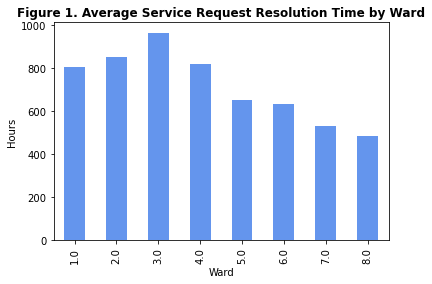

In [46]:
#display average service request resolution time by ward
res_hrs = serv_req.groupby('WARD')['RESOLUTIONHOURS'].mean().rename_axis("Ward").reset_index(name= "Average Resolution Hours")
res_hrs.plot.bar(x = "Ward", y = "Average Resolution Hours",color = "cornflowerblue", legend = False)
plot.title("Figure 1. Average Service Request Resolution Time by Ward", fontweight="bold")
plot.ylabel("Hours")
plot.show()

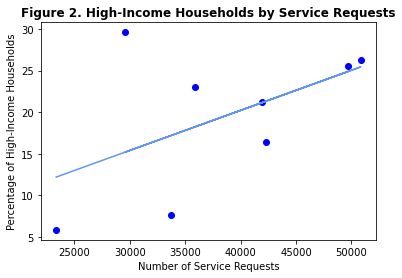

In [47]:
#display correlation plot for high-income households and service requests
plot.scatter(service_req1,high_income1, color = "blue")
plot.xlabel("Number of Service Requests")
plot.ylabel("Percentage of High-Income Households")
plot.title("Figure 2. High-Income Households by Service Requests", fontweight="bold")

#display line of best fit 
m, b = np.polyfit(service_req1, high_income1, 1)
plot.plot(service_req1, m*service_req1 + b, color = "cornflowerblue")
plot.show()

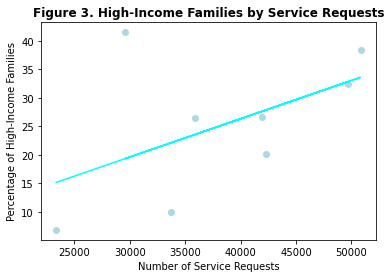

In [48]:
#display correlation plot for high-income families and service requests
plot.scatter(service_req2,high_income2, color = "lightblue")
plot.xlabel("Number of Service Requests")
plot.ylabel("Percentage of High-Income Families")
plot.title("Figure 3. High-Income Families by Service Requests", fontweight="bold")

#display line of best fit 
m, b = np.polyfit(service_req2, high_income2, 1)
plot.plot(service_req2, m*service_req2 + b, color = "cyan")
plot.show()

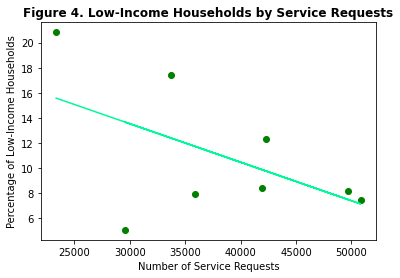

In [49]:
#display correlation plot for low-income households and service requests
plot.scatter(service_req3,low_income1, color = "green")
plot.xlabel("Number of Service Requests")
plot.ylabel("Percentage of Low-Income Households")
plot.title("Figure 4. Low-Income Households by Service Requests", fontweight="bold")

#display line of best fit 
m, b = np.polyfit(service_req3, low_income1, 1)
plot.plot(service_req3, m*service_req3 + b, color = "mediumspringgreen")
plot.show()

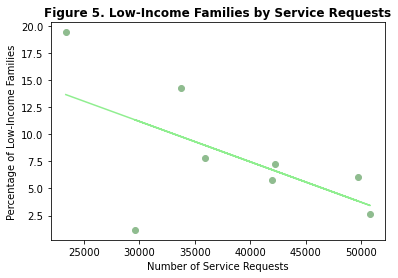

In [50]:
#display correlation plot for low-income families and service requests
plot.scatter(service_req4,low_income2, color = "darkseagreen")
plot.xlabel("Number of Service Requests")
plot.ylabel("Percentage of Low-Income Families")
plot.title("Figure 5. Low-Income Families by Service Requests", fontweight="bold")

#display line of best fit 
m, b = np.polyfit(service_req4, low_income2, 1)
plot.plot(service_req4, m*service_req4 + b, color = "lightgreen")
plot.show()

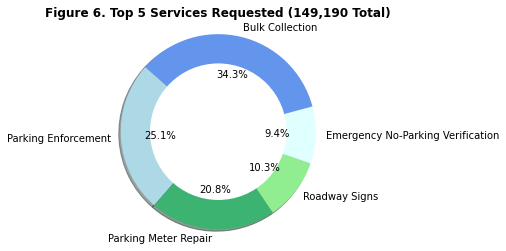

In [51]:
#display top five services requested with pie/circle chart
my_labels = sr_name
my_colors = ["cornflowerblue","lightblue","mediumseagreen","lightgreen","lightcyan"]

plot.pie(sr_cnt, labels = my_labels, autopct = "%1.1f%%", startangle = 15, shadow = True, colors = my_colors)
plot.title("Figure 6. Top 5 Services Requested (149,190 Total)", fontweight="bold")

centre_circle = plot.Circle((0,0),0.70,fc='white')
fig = plot.gcf()
fig.gca().add_artist(centre_circle)

plot.axis("Equal")
plot.show()

### Analytical Findings

Findings indicate that the more service requests a ward has, the more likely it is to have more residents earning high-income salaries and less residents earning low-income salaries. 

This determination is supported by the fact that Ward 7 and Ward 8 are two out of three wards that requested services the least and it has the least amount of residents earning high-income salaries and the most amount of residents earning earning low-income salaries. 

Details are broken down by range and type of income below:

**Household Income Associations with Service Requests**  
High: There is a moderate positive relationship (0.53) between the amount of service requests and the percentage of high-income households (see Figure 2).    
Low: There is a moderate negative relationship (-0.54) between the amount of service requests and the percentage of low-income households (see Figure 4). 

**Family Income Associations with Service Requests**   
High: There is a moderate positive relationship (0.52) between the amount of service requests and the percentage of high-income families (see Figure 3).   
Low: There is a moderate negative relationship (-0.59) between the amount of service requests and the percentage of low-income families (see Figure 5).

*Note*: Since the p-values of all of the correlations are greater than 0.1, the findings are not statistically significant. 

Additionally, service requests are resolved faster, on average, in lower-income wards (see Figure 1). 

Lastly, although Bulk Collection comprises the majority of service requests, overall it seems that parking-related service requests (Parking Enforcement, Parking Meter Repair, and Emergency No-Parking Verification) are really the majority if they were to be combined (see Figure 6). 

### Implications 

Although low-income wards tend to have less service requests, this does not necessarily mean that services aren't needed in these neighborhoods. In fact, these neighborhoods would arguably have more of a need for services pertaining to certain situations, such as graffitti removal and road repairs. 

However, service requests are citizen-initiated, meaning a lot of residents in low-income wards most likely either don't have the access to conveniently place requests electronically (over-the-phone), feel their requests won't be fulfilled due to socio-economic inequality, or believe that their neighborhoods are habitable the way they are.

That being said, the data shows that when residents from low-income wards make a service request, they will be resolved faster, on average, than services requested in higher-income wards. This could be due to many reasons, such as lower-income wards may be prioritized or the services requested may not take as much time to resolve as those requested in higher income areas. 

### Limitations

In terms of the data, the data set for the service requests was recorded in 2017 only, compared to the income dataset that was recorded from 2013 to 2017. A more accurate analysis would stem from a data set that recorded the amount of service requests from the same 4-year period as the income data set. 

As for the analysis, the correlation coefficients and visualizations look very similar when comparing household and family income because the data is relatively consistent between the two types of income. A more concise analysis would only utilize the household income data because it is a better representative of the resident population in each ward. 

### References

"311 City Service Requests in 2017", Accessed from [Open Data DC](https://opendata.dc.gov/datasets/311-city-service-requests-in-2017?geometry=-77.509%2C38.806%2C-76.520%2C38.993) on May 1, 2021.  
"American Community Survey (ACS) Estimates", Accessed from [DC.gov](https://planning.dc.gov/page/american-community-survey-acs-estimates) on May 1, 2021.   
"Missing Values in Data", Accessed from [Statistics Solutions](https://www.statisticssolutions.com/missing-values-in-data/) on May 1, 2021.

<style>
  table {margin-left: 0 !important;}
</style>

<a id='reference'></a>